In [2]:
import numpy as np
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib.pyplot import figure

2024-04-02 17:31:37.406662: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Daten Laden (mnist Datensatz)

In [3]:
# a) Daten laden (mnist Data-Set)
# b) Test-Train-Split durchführen
# mnist "old" - number 0..9
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# minist "new" - based on fashion images. same data structure. different (more sophisticated) content.
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


# Daten vorbereiten

Im Machine Learning muss man in der Regel die Daten vorbereiten und aufbereiten.
Hierbei muss sichergestellt werden, dass die Daten fürs Training geeignet sind.

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# give some shape infos
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


60000 train samples
10000 test samples
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


# Ausgabe von Beispiel-Daten

Folgender Code dient (lediglich) dazu, einige zufällig ausgewählte Beispiel-Bilder und deren Annotation anzuzeigen.

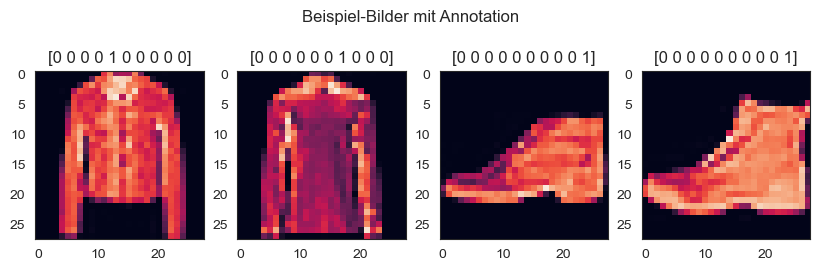

In [5]:
seaborn.set_style('white')
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

# Empty list containers to collect image infos
images=[None]*4
y_images=[None]*4

# Grap some random images and y_test values
for idx,image_nr in enumerate([10,758,456,1209]):
    images[idx]=x_test[image_nr]
    y_images[idx]=y_test[image_nr]

# Print images and y_test values
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(images[i])
    plt.title(y_images[i].astype(int))

# Visualize images
plt.suptitle('Beispiel-Bilder mit Annotation')
plt.show()

# Ein Neuronales Netz

Neuronale Netze bestehen aus sogenannten Neuronen - das sind letztlich mathematische Funktionen -, die in Ebenen angeordnet werden.

![image](../img/neural_network.png)

# Klassifikation mit Hilfe einer Regression

![Klassifikation](../img/klassifikation.png)

# Aufbau eines Neuronalen Netzes mit Hilfe von Keras

Keras ist ein sehr stark abstrahierendes Framework, mit dessen Hilfe neuronale Netze einfach erstellt, trainiert und angewendet werden können.

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
print ("Model build done.")

Model build done.


# Optionale Visualisierung

Es gibt eine Reihe von Frameworks, mit deren Hilfe Neuronale Netzwerke visualisiert werden können. 'visualkeras' ist ein Beispiel hierfür.

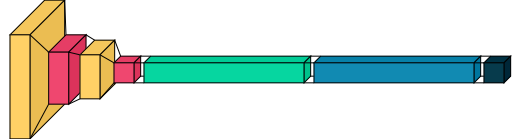

In [7]:
import visualkeras

visualkeras.layered_view(model)


# Training des Neuronalen Netzes

Ein mit Hife von Keras erstelltes Neuronales Netzwerk kann mit nur einem einzigen Befehl - dem Befehl 'fit' - trainiert werden.
Natürlich gibt es für die (spätere) Optimierung sehr viele Möglichkeiten zur Anpassung und Konfiguration.

## Keras ist ein leichtgewichtiger Einstieg für Anfänger:innen!

In [8]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 9s 20ms/step - loss: 0.7012 - accuracy: 0.7443 - val_loss: 0.4407 - val_accuracy: 0.8387
Epoch 2/3
422/422 [==============================] - 9s 22ms/step - loss: 0.4487 - accuracy: 0.8398 - val_loss: 0.3777 - val_accuracy: 0.8668
Epoch 3/3
422/422 [==============================] - 9s 22ms/step - loss: 0.4004 - accuracy: 0.8585 - val_loss: 0.3651 - val_accuracy: 0.8635


# Verlust des Netzwerkes berechnen.

Die unten gezeigte Variable 'score' enthält zwei Werte: Den Verlust und die sogenannte accuracy (engl.: Genauigkeit) - das ist eine von mehreren möglichen Metriken zum Messen der Güte eines ML Modells.

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3840058445930481
Test accuracy: 0.8603000044822693


# Trainiertes Neuronales Netz anwenden

Im nachfolgenden Code wird nun das fertig trainierte ML Modell auf die zuvor zurückgehaltenen Test-Daten angewendet.
Vergleicht man die Vorhersagen des Modells (y_pred) für die dem Modell unbekannten Test-Daten mit den zugehörigen tatsächlichen Annotationen, dann kann man Aussagen zur Generalisierungsfähigkeit und Güte dieses Modells machen.

In [10]:
# Predict classes for Test-Images
y_pred=model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


# Visualisierung der Vorhersagen

Im nachfolgenden optionalen Beispiel wird für einige zufällige Daten die tatsächliche Annotation mit der Vorhersage verglichen.

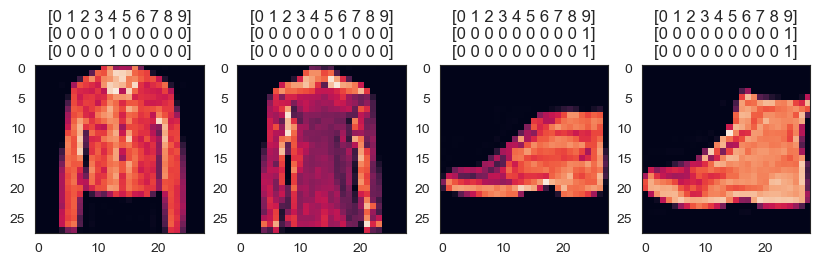

In [11]:
seaborn.set_style('white')
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

# Empty list containers to collect image infos
images=[None]*4
y_images=[None]*4
y_images_pred=[None]*4

# Grap some random images and y_test values
for idx,image_nr in enumerate([10,758,456,1209]):
    images[idx]=x_test[image_nr]
    y_images[idx]=y_test[image_nr]
    y_images_pred[idx]=y_pred[image_nr]

# Print images and y_test values
headline=np.arange(start=0, stop=10, step=1)

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(images[i])
    plt.title("{}\n{}\n{}".format(headline, y_images[i].astype(int),y_images_pred[i].round().astype(int)))

# Visualize images
plt.show()

# Kaggle House Prices mit Deep Learning

https://www.kaggle.com/code/dinasinclair/deep-learning-with-keras-housing-prices

# Quellen

https://keras.io/examples/vision/mnist_convnet/

Paaß, Hecker, Künstliche Intelligenz, Springer Nature 2020, https://doi.org/10.1007/978-3-658-30211-5

https://blog.rootcodelabs.com/neural-networks-the-21st-century-artist/

https://keras.io/

https://www.analyticsvidhya.com/blog/2022/03/visualize-deep-learning-models-using-visualkeras/

https://www.bualabs.com/

und eigene Darstellungen.

